# Stochastic Processes in finance

In [5]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [6]:
import numpy as np
import pandas as pd

#Plotting and Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [7]:
import platform
print(f"Python version: {platform.python_version()}")
print(f"numpy version: {np.__version__}")
print(f"panda version: {pd.__version__}")
print(f"seaborn version: {sns.__version__}")
import matplotlib
print(f"matplotlib version: {matplotlib.__version__}")
import statsmodels
print(f"statsmodel version: {statsmodels.__version__}")
import scipy
print(f"scipy version: {scipy.__version__}")

Python version: 3.10.14
numpy version: 1.23.5
panda version: 2.1.4
seaborn version: 0.13.2
matplotlib version: 3.7.5
statsmodel version: 0.14.1
scipy version: 1.11.4


## Simulate random walk

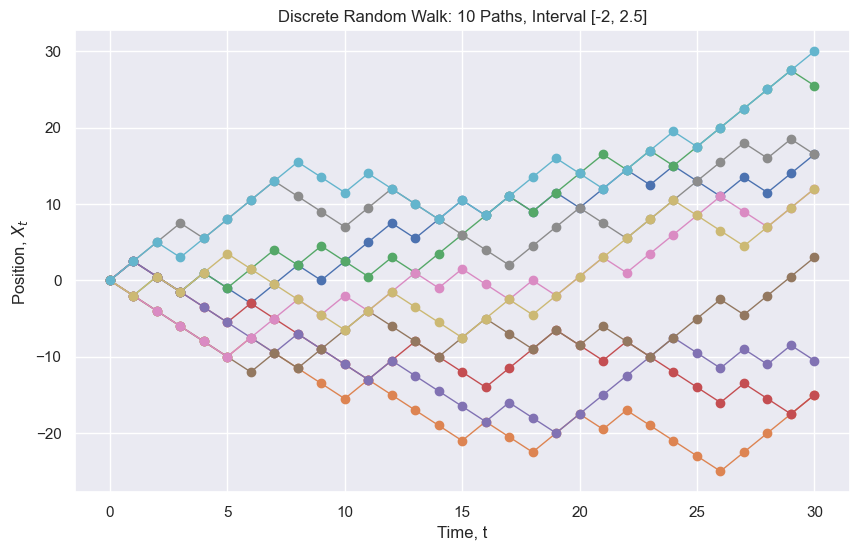

In [8]:
# code modified from https://www.youtube.com/watch?v=fIM_AQbBOm4

import numpy as np
import matplotlib.pyplot as plt


def generate_random_walk(t, N, interval=[-1, 1]):
    """
    Generates and plots a discrete random walk.

    Parameters:
    t (int): Total time
    N (int): Number of random walk paths.
    interval (int, optional): The interval size for each random walk step (default is [-1, 1]).
    
    """
    # Generate random steps (+1 or -1) for each path
    steps = np.random.choice(interval, size=(N, t)).T
    
    # Add the starting point (0) to each path
    origin = np.zeros((1,N))

    # Calculate the cumulative sum of steps to generate the random walk
    walk = np.concatenate([origin, steps]).cumsum(axis=0)
    
    # Plot the random walk paths
    plt.figure(figsize=(10, 6))
    plt.plot(walk, 'o-', lw=1)
    plt.title(f'Discrete Random Walk: {N} Paths, Interval {interval}')
    plt.xlabel('Time, t')
    plt.ylabel('Position, $X_t$')
    plt.grid(True)
    #plt.savefig('random_walk.jpg')
    plt.show()

# Run Simulation
# Symmetric Random Walk , each step moves +1 or −1
#generate_random_walk(t=30, N=10, interval=[-1,1])  

generate_random_walk(t=30, N=10, interval=[-2,2.5])


## Simulate Brownian Motion

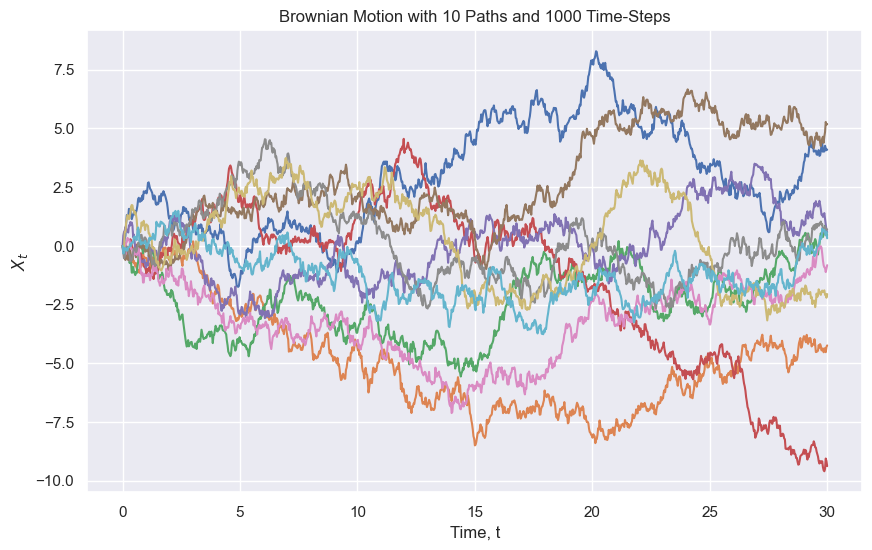

In [9]:
# code modified from https://www.youtube.com/watch?v=fIM_AQbBOm4

import numpy as np
import matplotlib.pyplot as plt

def brownian_motion(t, N, n):
    '''
    Parameters:
    t (int): Time time.
    N (int): Number of simulations.
    n (int): Number of time steps
    
    '''
    # Time step size
    dt = t / n

    # Generating Random Steps for Brownian Motion
    steps = np.random.normal(0, np.sqrt(dt), size=(N, n)).T  # Random normal increments
    # Add starting point (0) to each path
    origin = np.zeros((1,N))
    
    # Computing Cumulative Sum
    walks = np.concatenate([origin, steps]).cumsum(axis=0)
    
    # Generating Time Values for plotting
    time = np.linspace(0,t,n+1)
    tt = np.full(shape=(N, n+1), fill_value=time)
    tt = tt.T
    
    # Plot each path
    plt.figure(figsize=(10, 6))
    plt.plot(tt, walks)
    plt.title(f'Brownian Motion with {N} Paths and {n} Time-Steps')
    plt.xlabel('Time, t')
    plt.ylabel('$X_t$')
    plt.grid(True)
    #plt.savefig('brownian_motion.jpg')
    plt.show()

# Run Simulation
brownian_motion(30, 10, 1000)


## Simulate scaled random walk

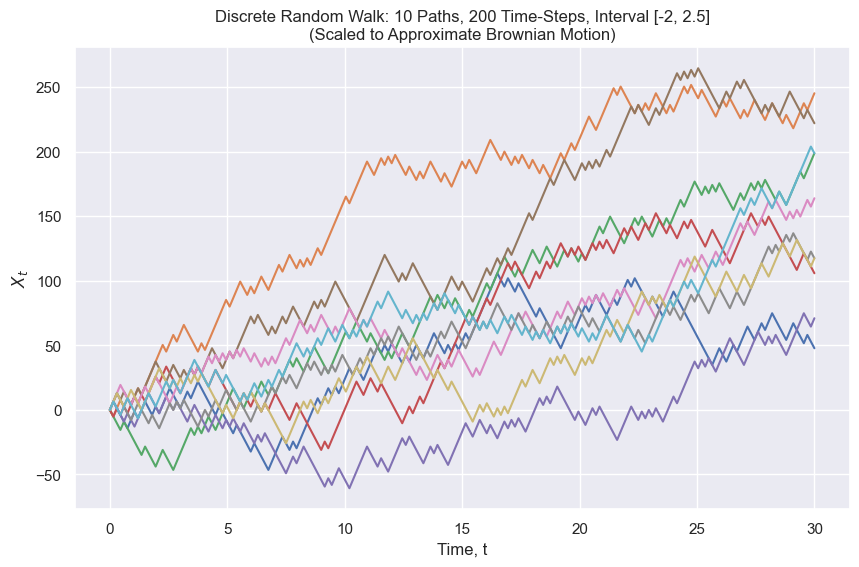

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_scaled_random_walk(t, N, n, interval=[-1, 1], scale=True):
    """
    Generates and plots a discrete random walk. If scale is True, the random walk is scaled
    to approach Brownian motion as per Donsker's Theorem.

    Parameters:
    t (int): Total time steps 
    N (int): Number of simulations.
    n (int): Number of Time-steps
    interval (list, optional): List of possible step sizes for the random walk (default is [-1, 1]).
    scale (bool, optional): If True, scales the random walk to approximate Brownian motion.
    
    """

    # Time step size
    dt = t / n
    
    # Scale the walk to approximate Brownian motion using Donsker's Theorem
    if scale:
        steps = (1/np.sqrt(dt)) * np.random.choice(interval, size=(N,n)).T
    else:
        steps = np.random.choice(interval, size=(N,n)).T
        
    # Add the starting point (0) to each path
    origin = np.zeros((1,N))
    walk = np.concatenate([origin, steps]).cumsum(axis=0) 

    # Generating Time Values for plotting
    time = np.linspace(0,t,n+1)
    tt = np.full(shape=(N, n+1), fill_value=time)
    tt = tt.T
    
    # Plot the random walk paths
    plt.figure(figsize=(10, 6))
    plt.plot(tt, walk)
    plt.title(f'Discrete Random Walk: {N} Paths, {n} Time-Steps, Interval {interval}\n(Scaled to Approximate Brownian Motion)')
    plt.xlabel('Time, t')
    plt.ylabel('$X_t$')
    #plt.savefig('scaled_random_walk.jpg')
    plt.show()

# Run Simulation
generate_scaled_random_walk(t=30, N=10, n=200, interval=[-2,  2.5], scale=True)


## quadratic variation of the S&P 500’s simple returns

[*********************100%%**********************]  1 of 1 completed


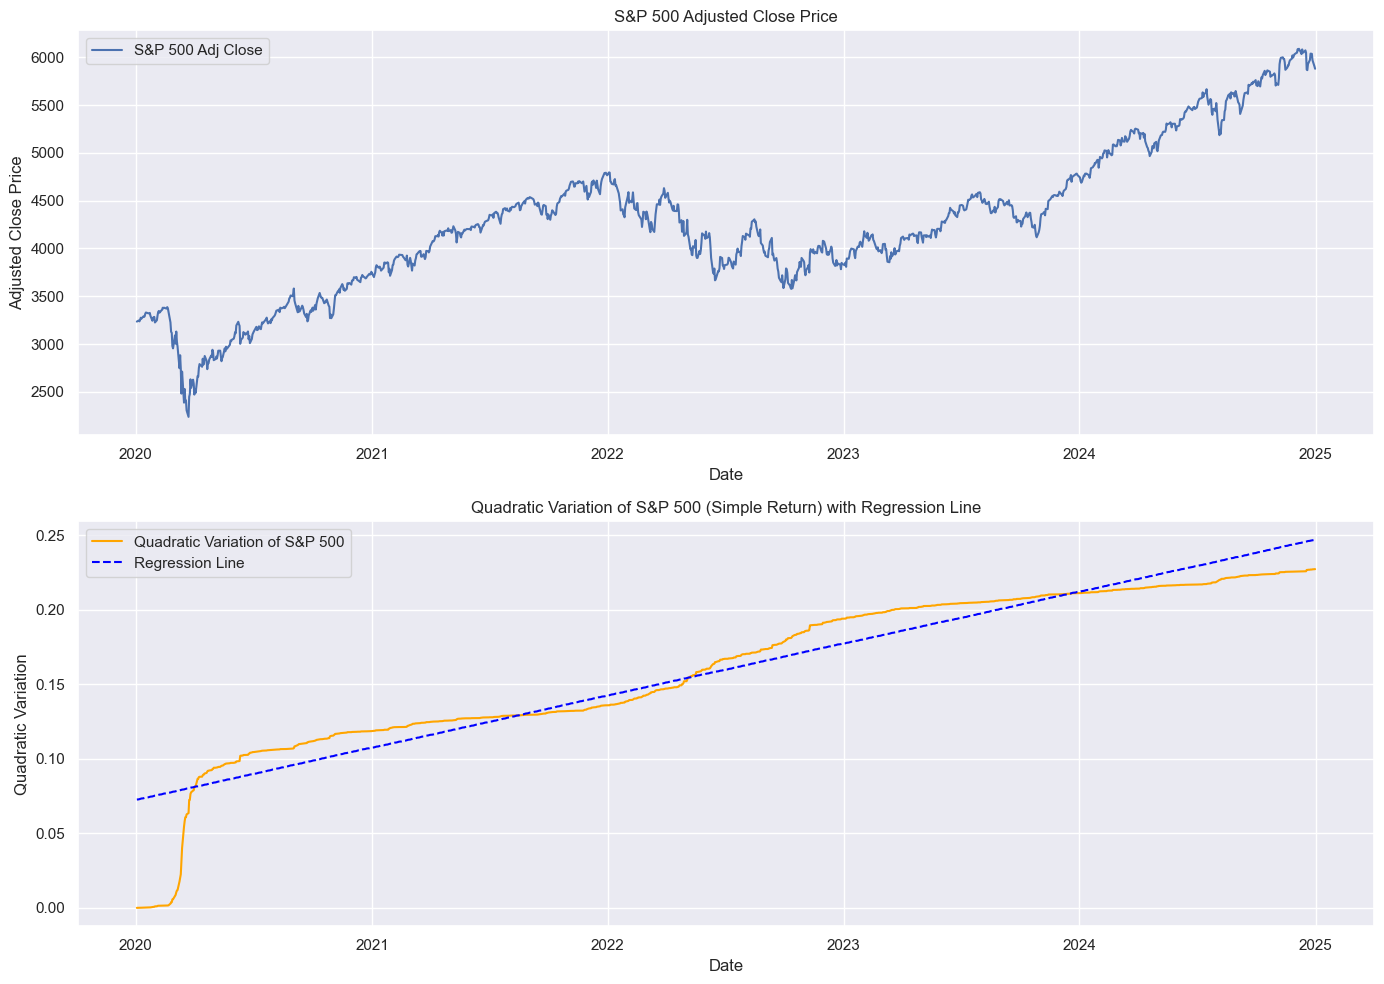

In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Download historical data for the S&P 500
ticker = '^GSPC'
data = yf.download(ticker, start='2020-01-01', end='2025-01-01', interval='1d')
data['Return'] = data['Adj Close'].pct_change()

# Drop NaN values
data.dropna(inplace=True)

# Calculate quadratic variation
data['Squared Return'] = data['Return'] ** 2
data['Quadratic Variation'] = data['Squared Return'].cumsum()

# Perform linear regression on quadratic variation
x = np.arange(len(data))
y = data['Quadratic Variation'].values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

# Plot the S&P 500 prices and its quadratic variation with regression line
plt.figure(figsize=(14,10))

plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='S&P 500 Adj Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('S&P 500 Adjusted Close Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(data['Quadratic Variation'], label='Quadratic Variation of S&P 500', color='orange')
plt.plot(data.index, regression_line, label='Regression Line', color='blue', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Quadratic Variation')
plt.title('Quadratic Variation of S&P 500 (Simple Return) with Regression Line')
plt.legend()
#plt.savefig("sp500_QV.jpg")
plt.tight_layout()
plt.show()


# Simulating Geometric Brownian Motion (GBM) in Python

In [12]:
# https://quantpy.com.au/stochastic-calculus/simulating-geometric-brownian-motion-gbm-in-python/
# https://www.youtube.com/watch?v=jejjUPfaIXY

In this tutorial we will be simulating Geometric Brownian Motion in Python.
Geometric Brownian motion (GBM) S is defined by S0 > 0 and the dynamics as defined in the following Stochastic Differential Equation (SDE):
$$\Large dS_t = \mu S_t dt + \sigma S_t dW_t $$
Integrated Form:
  $$\log S_t = \log S_0 + \int_{0}^{t} (\mu-\frac{\sigma^2}{2}) \,ds + \int_{0}^{t} \sigma \,dW_s $$
  $$\log S_t = \log S_0 + (\mu-\frac{\sigma^2}{2})t + \sigma W_t $$
  $$\log S_t \sim N(\log S_0 + (\mu-\frac{\sigma^2}{2})t, \sigma^2 t) $$

Explicit Expression:
$$\Large S_t = S_0 {\rm e}^{(\mu-\frac{\sigma^2}{2})t + \sigma W_t}$$


We have two options here, we can either:
– (like here) simulate the stock price directly throughout the simulation and multiple the exponential terms together at each time step; or
– we can simulate the log normal distribution and cumulatively add the terms along each sample path

[*********************100%%**********************]  1 of 1 completed


Daily Drift (mu): 0.001182
Daily Volatility (sigma): 0.019932
Annual Drift (mu_annual): 0.297744
Annual Volatility (sigma_annual): 0.316414


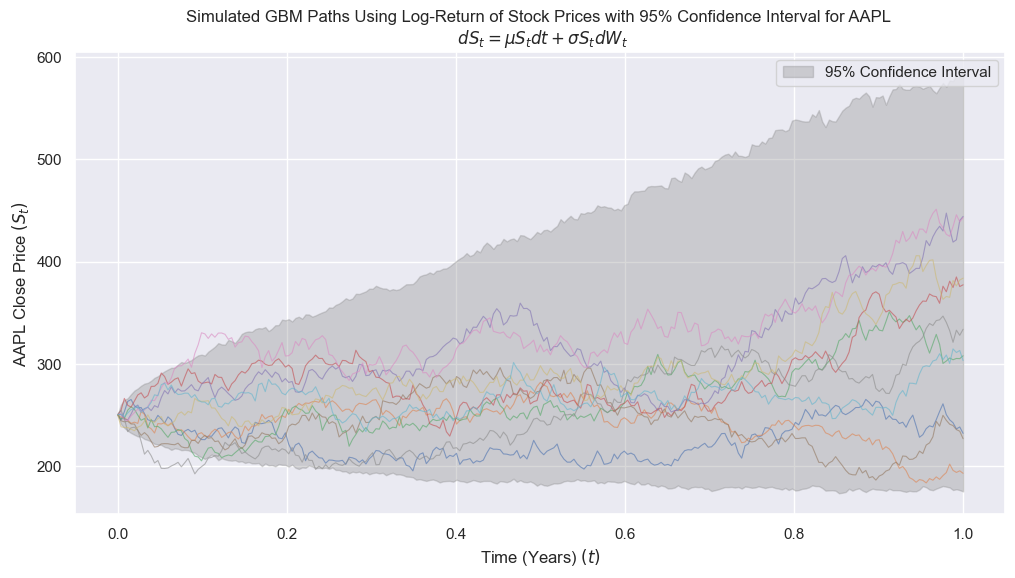

In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download Historical Stock Data
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

#--------------------------------------------------------------------------------------------
#  Here, assume the simulated stock prices follow a log-normal distribution at each time step.
#  But, Kolmogorov-Smirnov Test shows it does NOT follow a normal distribution
#--------------------------------------------------------------------------------------------

# Calculate Log Returns for Estimation
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
log_returns = data['Log_Returns'].dropna()

# Estimate Parameters (mu and sigma)
sigma = np.std(log_returns)
mu = log_returns.mean() + (sigma ** 2) / 2

# Annualize Parameters
mu_annual = mu * 252
sigma_annual = sigma * np.sqrt(252)

print(f"Daily Drift (mu): {mu:.6f}")
print(f"Daily Volatility (sigma): {sigma:.6f}")
print(f"Annual Drift (mu_annual): {mu_annual:.6f}")
print(f"Annual Volatility (sigma_annual): {sigma_annual:.6f}")

# Simulate GBM Paths Using Log-Normal Property
def simulate_gbm_log_normal(S0, mu, sigma, T, dt, n_sim):
    """
    Simulate Geometric Brownian Motion paths using log-normal property.
    :param S0: Initial stock price
    :param mu: Drift
    :param sigma: Volatility
    :param T: Time horizon (in years)
    :param dt: Time step (in years)
    :param n_sim: Number of simulations
    :return: Simulated paths
    """
    n_steps = int(T / dt)
    time_grid = np.linspace(0, T, n_steps + 1)
    paths = np.zeros((n_steps + 1, n_sim))
    paths[0] = S0

    for i in range(1, n_steps + 1):
        Z = np.random.standard_normal(n_sim)  # Random normal variables
        paths[i] = paths[i - 1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z)
    return paths, time_grid

# Parameters for GBM Simulation
S0 = data['Adj Close'][-1]  # Use the latest closing price as the initial price
T = 1.0  # 1 year
dt = 1 / 252  # Daily steps
n_sim = 1000  # Number of simulated paths

# Simulate paths
simulated_paths, time_grid = simulate_gbm_log_normal(S0, mu_annual, sigma_annual, T, dt, n_sim)

# Calculate Confidence Interval
percentiles = [2.5, 97.5]  # 95% confidence interval
confidence_bounds = np.percentile(simulated_paths, percentiles, axis=1)

# Plot Results
plt.figure(figsize=(12, 6))

# Plot simulated paths
for i in range(10):  # Plot only 10 paths for clarity
    plt.plot(time_grid, simulated_paths[:, i], lw=0.8, alpha=0.6)

# Plot confidence intervals
plt.fill_between(time_grid, confidence_bounds[0], confidence_bounds[1], color='gray', alpha=0.3, label="95% Confidence Interval")

# Labels and title
plt.title(f"Simulated GBM Paths Using Log-Return of Stock Prices with 95% Confidence Interval for {ticker} \n $dS_t = \mu S_t dt + \sigma S_t dW_t$")
plt.xlabel("Time (Years) $(t)$")
plt.ylabel(f"{ticker} Close Price $(S_t)$")
plt.legend()
#plt.savefig("GBM_sim.jpg")
plt.show()


In [14]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, kstest, norm

ticker = "AAPL"

# Download Historical Stock Data
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")


# Calculate the natural logarithm of the stock prices
log_prices = np.log(data['Close'])

# Shapiro-Wilk test
shapiro_test = shapiro(log_prices)
print(f'Shapiro-Wilk Test: Statistics={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Kolmogorov-Smirnov test
ks_test = kstest(log_prices, 'norm', args=(np.mean(log_prices), np.std(log_prices)))
print(f'Kolmogorov-Smirnov Test: Statistics={ks_test.statistic}, p-value={ks_test.pvalue}')

# Interpretation
alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Shapiro-Wilk Test: The log-transformed data follows a normal distribution (fail to reject H0)")
else:
    print("Shapiro-Wilk Test: The log-transformed data does not follow a normal distribution (reject H0)")

if ks_test.pvalue > alpha:
    print("Kolmogorov-Smirnov Test: The log-transformed data follows a normal distribution (fail to reject H0)")
else:
    print("Kolmogorov-Smirnov Test: The log-transformed data does not follow a normal distribution (reject H0)")


[*********************100%%**********************]  1 of 1 completed

Shapiro-Wilk Test: Statistics=0.936042845249176, p-value=8.076684220523118e-23
Kolmogorov-Smirnov Test: Statistics=0.09613737293858388, p-value=1.4290238968854268e-10
Shapiro-Wilk Test: The log-transformed data does not follow a normal distribution (reject H0)
Kolmogorov-Smirnov Test: The log-transformed data does not follow a normal distribution (reject H0)


## Simulating Cox-Ingersoll-Ross Model (CIR)

[*********************100%%**********************]  1 of 1 completed


Calibrated parameters: a = 0.4989, b = 0.0498, sigma = 0.0234


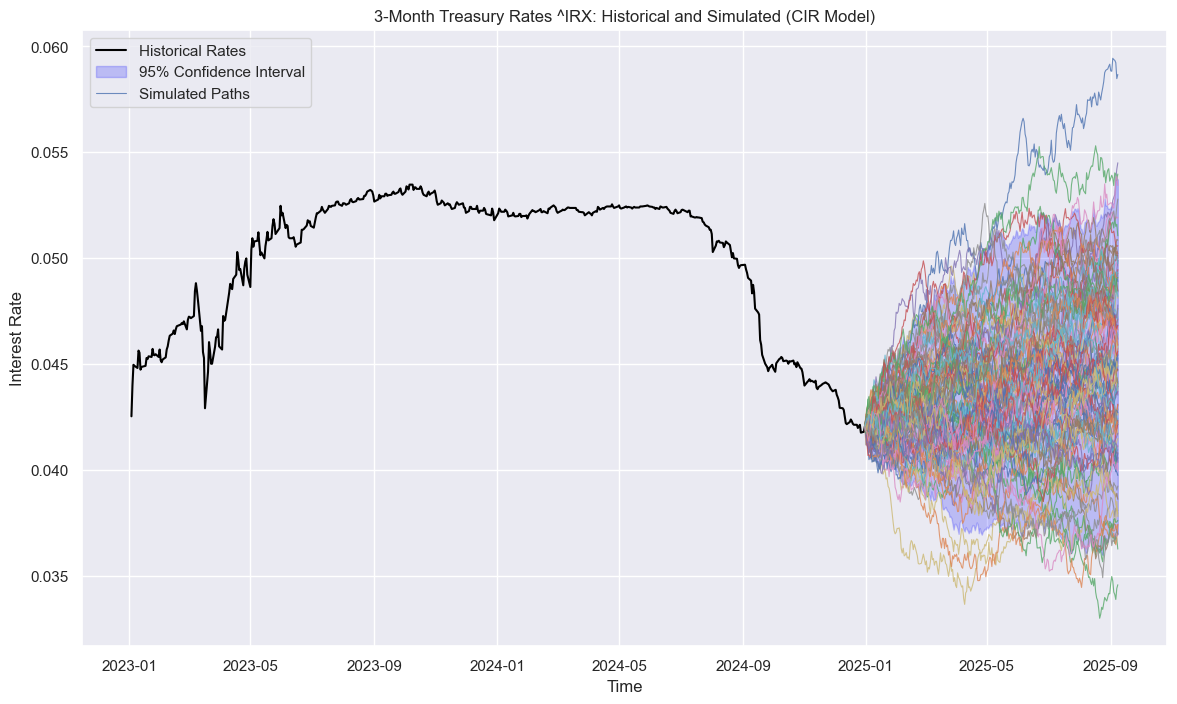

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize
from datetime import timedelta

# Download Historical 3-Month Treasury Rates
def fetch_treasury_data(ticker, start, end):
    data = yf.download(ticker, start, end)
    rates = data['Adj Close'] / 100  # as the data are expressed in percentage
    rates = rates.dropna()
    rates.index = pd.to_datetime(rates.index)  # Ensure datetime index
    return rates

ticker ="^IRX"
rates = fetch_treasury_data(ticker=ticker, start="2023-01-01", end="2025-01-01")

# CIR Model Calibration using negative log likelihood
def cir_neg_log_likelihood(params, rates, dt):
    a, b, sigma = params
    likelihood = 0
    for t in range(1, len(rates)):
        rt, rt_prev = rates[t], rates[t - 1]
        mu = rt_prev + a * (b - rt_prev) * dt
        var = sigma**2 * rt_prev * dt
        if rt_prev <= 0:
            var = 1e-6  # Avoid zero division
        likelihood += 0.5 * (np.log(2 * np.pi * var) + (rt - mu)**2 / var)
    return likelihood

# Initial guesses for parameters
initial_params = [0.5, 0.03, 0.1]  # [a, b, sigma]
dt = 1 / 252  # Monthly data

# Optimize using historical data
result = minimize(cir_neg_log_likelihood, initial_params, args=(rates.values, dt),
                  bounds=[(1e-3, None), (1e-3, None), (1e-3, None)])
a_calib, b_calib, sigma_calib = result.x
print(f"Calibrated parameters: a = {a_calib:.4f}, b = {b_calib:.4f}, sigma = {sigma_calib:.4f}")

# Simulate Future Interest Rates
def simulate_cir(a, b, sigma, r0, T, dt, n_paths):
    N = int(T / dt)
    rates = np.zeros((N, n_paths))
    rates[0, :] = r0
    for t in range(1, N):
        dr = a * (b - rates[t-1, :]) * dt + sigma * np.sqrt(np.maximum(rates[t-1, :], 0)) * np.sqrt(dt) * np.random.normal(size=n_paths)
        rates[t, :] = rates[t-1, :] + dr
    return rates

# Parameters
r0 = rates.iloc[-1]  # Last observed rate
T = 1.0  # Simulate 1 years
n_paths = 100  # Number of simulated paths

simulated_rates = simulate_cir(a_calib, b_calib, sigma_calib, r0, T, dt, n_paths)

# Generate future time index
last_date = rates.index[-1]
future_dates = pd.date_range(start=last_date, periods=simulated_rates.shape[0], freq='D')

# Calculate Confidence Interval
percentiles = [2.5, 97.5]  # 95% confidence interval
confidence_bounds = np.percentile(simulated_rates, percentiles, axis=1)


# Plot Historical and Simulated Rates
time = pd.date_range(start=rates.index[0], periods=len(rates), freq='D')
plt.figure(figsize=(14, 8))

# Plot historical rates
plt.plot(rates.index, rates, label="Historical 3-Month Treasury Rates", color="black")

# Plot confidence intervals
plt.fill_between(future_dates, confidence_bounds[0], confidence_bounds[1], color='blue', alpha=0.2, label="95% Confidence Interval")

# Plot simulated paths
for i in range(n_paths):
    plt.plot(future_dates, simulated_rates[:, i], alpha=0.8, lw=0.8)

plt.title(f"3-Month Treasury Rates {ticker}: Historical and Simulated (CIR Model)")
plt.xlabel("Time")
plt.ylabel("Interest Rate")
plt.legend(["Historical Rates", "95% Confidence Interval", "Simulated Paths"])
#plt.savefig("CIR_sim.jpg")
plt.show()


### Calculate Hurst exponent on S&P500 Adj Close price

In [16]:
# ------------------------------------
# Required library from  https://pypi.org/project/hurst/
# pip install hurst
# -----------------------------------


import numpy as np
import pandas as pd
import yfinance as yf

from hurst import compute_Hc

# Fetching S&P 500 data
data = yf.download('^GSPC', start='2020-01-01', end='2025-01-01')
close_prices = data['Adj Close']

# Transform it into a stationary series
log_returns = np.log(close_prices / close_prices.shift(1)).dropna()

H, _ , _ = compute_Hc(log_returns, kind='change', simplified=False)
print(f'Hurst Exponent: {H}')

[*********************100%%**********************]  1 of 1 completed

Hurst Exponent: 0.561330613382804


## Simulate Brownian Motion with Drift (also known as arithmetic Brownian motion) 

[*********************100%%**********************]  1 of 1 completed


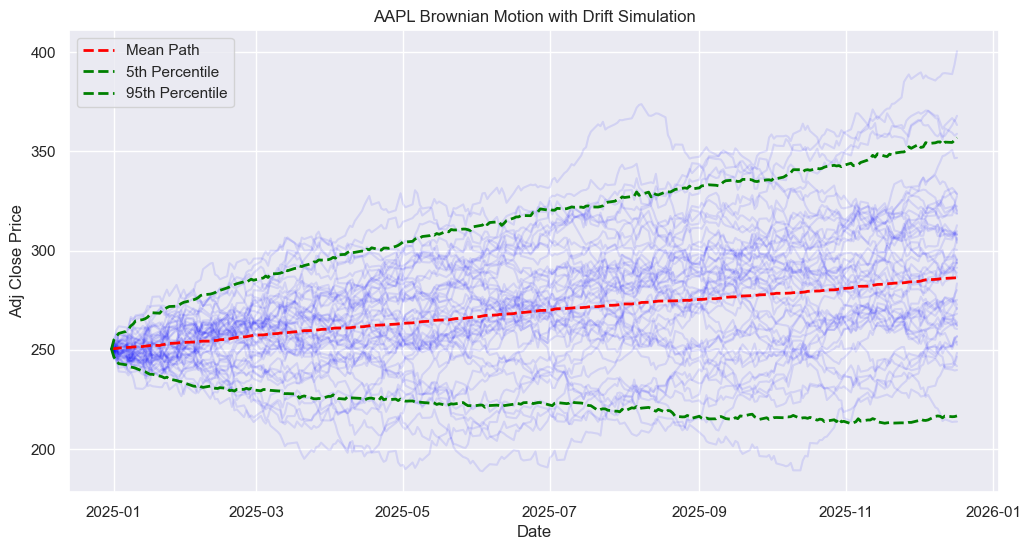


Simulation Parameters:
Initial Price: $250.42
Annual Drift: $35.61
Annual Volatility: $42.31

Simulation Results (after 252 trading days):
Mean Projected Price: $286.38
5th Percentile: $216.68
95th Percentile: $356.93


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

def get_stock_data(ticker, start_date, end_date):
    """
    Download historical stock data using yfinance
    """
    stock = yf.download(ticker, start=start_date, end=end_date)
    return stock['Adj Close']

def calculate_parameters(prices):
    """
    Calculate drift and volatility parameters from historical data
    """
    # Calculate absolute price changes
    price_changes = prices.diff().dropna()
    mu = price_changes.mean() * 252  # annualized drift
    sigma = price_changes.std() * np.sqrt(252)  # annualized volatility
    return mu, sigma

def simulate_brownian_paths(S0, mu, sigma, T, N, num_paths):
    """
    Simulate multiple paths of arithmetic Brownian motion with drift
    
    Parameters:
    S0: Initial stock price
    mu: Drift (annualized)
    sigma: Volatility (annualized)
    T: Time horizon in years
    N: Number of time steps
    num_paths: Number of simulation paths
    """
    dt = T/N
    t = np.linspace(0, T, N)
    
    # Generate random normal increments
    dW = np.random.normal(0, np.sqrt(dt), size=(num_paths, N-1))
    
    # Calculate price increments
    dS = mu * dt + sigma * dW
    
    # Calculate cumulative changes
    S = np.cumsum(dS, axis=1)
    
    # Add initial price and reshape
    S = np.concatenate([np.zeros((num_paths, 1)), S], axis=1)
    paths = S0 + S
    
    return t, paths

# Set parameters
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'
simulation_days = 252  # One trading year
num_paths = 1000

# Get historical data
historical_prices = get_stock_data(ticker, start_date, end_date)
S0 = historical_prices[-1]  # Last available price

# Calculate parameters
mu, sigma = calculate_parameters(historical_prices)

# Simulate paths
T = simulation_days/252  # Convert to years
N = simulation_days
t, paths = simulate_brownian_paths(S0, mu, sigma, T, N, num_paths)

# Plot results
plt.figure(figsize=(12, 6))

# Plot simulated paths
future_dates = pd.date_range(start=historical_dates[-1], periods=N, freq='B')
for i in range(min(50, num_paths)):  # Plot first 50 paths for visibility
    plt.plot(future_dates, paths[i], alpha=0.1, color='blue')

# Plot mean path and confidence intervals
mean_path = paths.mean(axis=0)
percentile_5 = np.percentile(paths, 5, axis=0)
percentile_95 = np.percentile(paths, 95, axis=0)

plt.plot(future_dates, mean_path, '--', color='red', label='Mean Path', linewidth=2)
plt.plot(future_dates, percentile_5, '--', color='green', label='5th Percentile', linewidth=2)
plt.plot(future_dates, percentile_95, '--', color='green', label='95th Percentile', linewidth=2)

plt.title(f'{ticker} Brownian Motion with Drift Simulation')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.savefig("Brownian_Drift.jpg")
plt.show()

# Print statistics
print(f"\nSimulation Parameters:")
print(f"Initial Price: ${S0:.2f}")
print(f"Annual Drift: ${mu:.2f}")
print(f"Annual Volatility: ${sigma:.2f}")
print(f"\nSimulation Results (after {simulation_days} trading days):")
print(f"Mean Projected Price: ${mean_path[-1]:.2f}")
print(f"5th Percentile: ${percentile_5[-1]:.2f}")
print(f"95th Percentile: ${percentile_95[-1]:.2f}")

## Simulate Fractional Brownian Motion (fBM)

[*********************100%%**********************]  1 of 1 completed


Calculated Hurst Exponent: 0.545746
Estimated Annualized Drift: 0.297784
Estimated Annualized Volatility: 0.316540


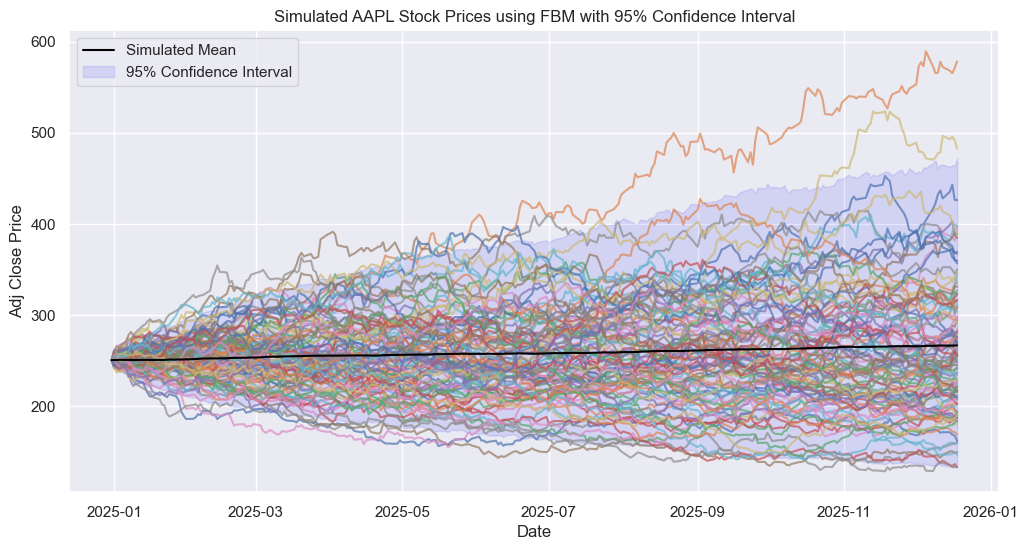



Execution time for grid search: 0 hours, 0 minutes, 49 seconds


In [18]:
# ------------------------------------
# Required library:
# pip install fbm hurst
# -----------------------------------


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from fbm import fbm
from hurst import compute_Hc
import time  
start_time = time.time()  

from hurst import compute_Hc

# Load historical stock data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-01-01'
data = yf.download(ticker, start=start_date, end=end_date)
adj_close = data['Adj Close']

# Calculate the Hurst exponent
log_returns = np.log(adj_close).diff().dropna()
#hurst_exponent_value = hurst_exponent(log_returns, min_subseries_length=10)
#print(f'Calculated Hurst Exponent: {hurst_exponent_value:.2f}')
H, _ , _ = compute_Hc(log_returns, kind='change', simplified=False)
print(f'Calculated Hurst Exponent: {H:.6f}')


# Parameters for the simulation
num_simulations = 1000  # Number of simulations
num_trading_days = 252  # 252 trading days in a year

# Estimate drift and volatility
mu , sigma = log_returns.mean(), log_returns.std()
daily_volatility = sigma
daily_drift = mu + (sigma ** 2) / 2

# Annualize drift and volatility
annualized_drift = daily_drift * num_trading_days
annualized_volatility = daily_volatility * np.sqrt(num_trading_days)

print(f'Estimated Annualized Drift: {annualized_drift:.6f}')
print(f'Estimated Annualized Volatility: {annualized_volatility:.6f}')

# Generate FBM paths
def generate_fbm_paths(num_simulations, num_days, hurst_parameter):
    fbm_paths = []
    for _ in range(num_simulations):
        fbm_path = fbm(n=num_days, hurst=hurst_parameter, length=1, method='cholesky')
        fbm_paths.append(fbm_path)
    return np.array(fbm_paths)

#fbm_paths = generate_fbm_paths(num_simulations, num_trading_days, hurst_exponent_value)
fbm_paths = generate_fbm_paths(num_simulations, num_trading_days, H)
# Simulate stock prices
def simulate_stock_prices(adj_close, fbm_paths, num_days, drift, volatility):
    last_price = adj_close.iloc[-1]
    simulated_prices = []
    dt = 1 / num_days
    for fbm_path in fbm_paths:
        price_path = last_price * np.exp(drift * dt + volatility * fbm_path)
        simulated_prices.append(price_path)
    return np.array(simulated_prices)

simulated_prices = simulate_stock_prices(adj_close, fbm_paths, num_trading_days, annualized_drift, annualized_volatility)

# Plot the first few simulated paths
plt.figure(figsize=(12, 6))
for i in range(100): # Plot only 100 paths for context
    plt.plot(pd.date_range(data.index[-1], periods=num_trading_days+1, freq='B'), simulated_prices[i], alpha=0.7)

# Calculate 95% confidence intervals
lower_bound = np.percentile(simulated_prices, 2.5, axis=0)
upper_bound = np.percentile(simulated_prices, 97.5, axis=0)
mean_path = np.mean(simulated_prices, axis=0)

plt.plot(pd.date_range(data.index[-1], periods=num_trading_days +1, freq='B'), mean_path, label="Simulated Mean", color='black')

# Plot confidence interval
plt.fill_between(
    pd.date_range(data.index[-1], periods=num_trading_days+1, freq='B'), 
    lower_bound, 
    upper_bound, 
    color='blue', 
    alpha=0.1, 
    label="95% Confidence Interval"
)

plt.title(f'Simulated {ticker} Stock Prices using FBM with 95% Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
#plt.savefig("fBM_sim.jpg")
plt.show()


print("\n")
end_time = time.time()  
execution_time = end_time - start_time  
hours, remainder = divmod(execution_time, 3600)  
minutes, seconds = divmod(remainder, 60)   
print(f"Execution time for grid search: {int(hours)} hours, {int(minutes)} minutes, {int(seconds)} seconds")

## Simulate Fractional Lévy Stable Motion (FLSM)

[*********************100%%**********************]  1 of 1 completed


Stability Parameter (alpha): 1.6918550115260742
Skewness Parameter (beta): -0.1609020074320644
Location Parameter (mu): 0.0006726488955766563
Scale Parameter (sigma): 0.0110509052973836
Hurst Parameter (H): 0.545746187010771


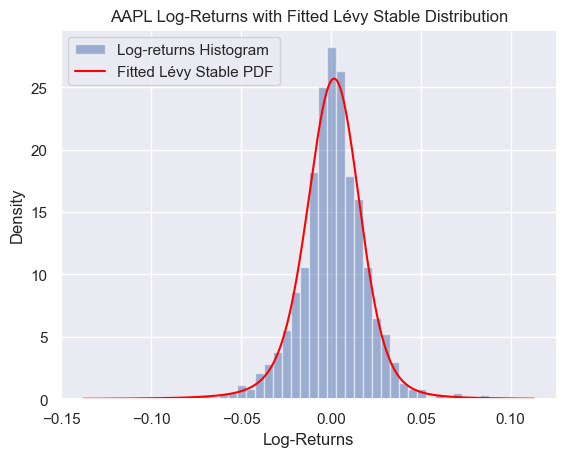

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from hurst import compute_Hc

# Fetch historical stock data and compute log-returns
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1)).dropna()

#=============================================================================================
# Estimate Lévy stable parameters
#=============================================================================================

# `levy_stable.fit` uses MLE to estimate parameters
alpha, beta, loc, scale = levy_stable.fit(log_returns)

# Estimate Hurst parameter using R/S analysis
H, _ , _ = compute_Hc(log_returns, kind='change', simplified=False)

# Print estimated parameters
print(f"Stability Parameter (alpha): {alpha}")
print(f"Skewness Parameter (beta): {beta}")
print(f"Location Parameter (mu): {loc}")
print(f"Scale Parameter (sigma): {scale}")
print(f"Hurst Parameter (H): {H}")

# Plot histogram and fitted distribution for comparison
x = np.linspace(min(log_returns), max(log_returns), 1000)
pdf_fitted = levy_stable.pdf(x, alpha, beta, loc, scale)

plt.hist(log_returns, bins=50, density=True, alpha=0.5, label="Log-returns Histogram")
plt.plot(x, pdf_fitted, label="Fitted Lévy Stable PDF", color="red")
plt.legend()
plt.title(f"{ticker} Log-Returns with Fitted Lévy Stable Distribution")
plt.xlabel("Log-Returns")
plt.ylabel("Density")
#plt.savefig("FLSM_para.jpg")
plt.show()

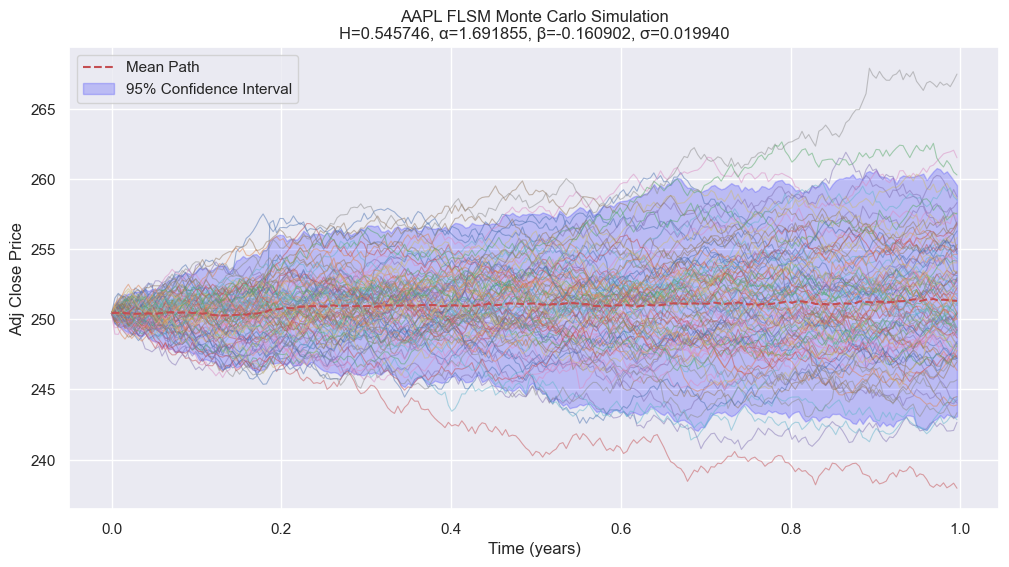

Initial Price: $250.42
Historical Volatility: 2.0%

Statistical Analysis after 252 trading days:
Mean Price: $251.31
Standard Deviation: $4.59
95% VaR: $6.39
95% CVaR: $8.28


In [20]:
#=============================================================================================
# Fractional Lévy Stable Motion (FLSM) Simulation
#=============================================================================================

def levy_stable_random(alpha, beta, n_samples):
    """Generate Lévy stable distributed random numbers"""
    u = np.random.uniform(-np.pi/2, np.pi/2, n_samples)
    w = np.random.exponential(1, n_samples)
    
    theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2)) / alpha
    
    if alpha != 1:
        x = np.sin(alpha * (u + theta_0)) * np.power(
            (np.cos(u) * np.cos(theta_0))**(-1/alpha) *
            (np.cos(u - alpha * (u + theta_0))/w)**((1-alpha)/alpha),
            1/alpha
        )
    else:
        x = (2/np.pi) * ((np.pi/2 + beta * u) * np.tan(u) -
            beta * np.log(np.pi/2 * w * np.cos(u)/(np.pi/2 + beta * u)))
    
    return x

def fractional_levy_motion(n_points, H, alpha, beta, dt=1):
    """Generate Fractional Lévy Stable Motion"""
    t = np.arange(n_points) * dt
    increments = levy_stable_random(alpha, beta, n_points)
    
    flsm = np.zeros(n_points)
    for i in range(1, n_points):
        weights = np.power(np.arange(1, i+1), H-1/alpha)
        flsm[i] = np.sum(weights * increments[:i][::-1])
    
    return t, flsm

def monte_carlo_flsm(S0, sigma, n_paths, n_points, H, alpha, beta, dt=1):
    """Perform Monte Carlo simulation using FLSM with volatility scaling"""
    paths = np.zeros((n_paths, n_points))
    t = np.arange(n_points) * dt
    
    # Calculate scaling factor based on historical volatility
    scale = sigma / np.sqrt(252)  # Daily volatility
    
    for i in range(n_paths):
        _, flsm = fractional_levy_motion(n_points, H, alpha, beta, dt)
        # Scale the FLSM and convert to price paths
        scaled_flsm = scale * flsm
        paths[i] = S0 * np.exp(scaled_flsm - 0.5 * scale**2 * t)  # Add drift adjustment
    
    return t, paths

# Initial Parameters
S0 = data['Adj Close'][-1]
num_trading_days = 252  # assuming 252 trading days/year
n_paths = 100  # number of simulation paths
n_points = num_trading_days
dt = 1/num_trading_days  # time steps size

# Run simulation with volatility scaling
t, paths = monte_carlo_flsm(S0, sigma, n_paths, n_points, H, alpha, beta, dt)

# confidence intervals
mean_prices = np.mean(paths, axis=0)
std_prices = np.std(paths, axis=0)
conf_interval_2_5th = np.percentile(paths, 2.5, axis=0)
conf_interval_97_5th = np.percentile(paths, 97.5, axis=0)


# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, paths.T, alpha=0.5, lw=0.8)
plt.plot(t, mean_prices, 'r--', label='Mean Path')
plt.fill_between(t, conf_interval_2_5th, conf_interval_97_5th, color="blue", alpha=0.2, label="95% Confidence Interval")

plt.title(f'{ticker} FLSM Monte Carlo Simulation\nH={H:.6f}, α={alpha:.6f}, β={beta:.6f}, σ={sigma:.6f}')
plt.xlabel('Time (years)')
plt.ylabel('Adj Close Price')
plt.legend()
plt.savefig("FLSM_sim.jpg")
plt.show()

# Calculate statistics
final_prices = paths[:, -1]
mean_price = np.mean(final_prices)
std_price = np.std(final_prices)
var_95 = np.percentile(final_prices, 5)
cvar_95 = np.mean(final_prices[final_prices <= var_95])

print(f"Initial Price: ${S0:.2f}")
print(f"Historical Volatility: {sigma:.1%}")
print(f"\nStatistical Analysis after {n_points} trading days:")
print(f"Mean Price: ${mean_price:.2f}")
print(f"Standard Deviation: ${std_price:.2f}")
print(f"95% VaR: ${(S0 - var_95):.2f}")
print(f"95% CVaR: ${(S0 - cvar_95):.2f}")

## Simulate Rough Heston Model

[*********************100%%**********************]  1 of 1 completed


Estimated Parameters:
V0 (Initial Variance): 0.100198
mu (Drift): 0.247685
kappa (Mean Reversion Speed): 0.792455
theta (Long-Term Variance): 0.021492
xi (Vol of Vol): 0.316694
rho (Correlation): -0.001096
Hurst Exponent: 0.545746


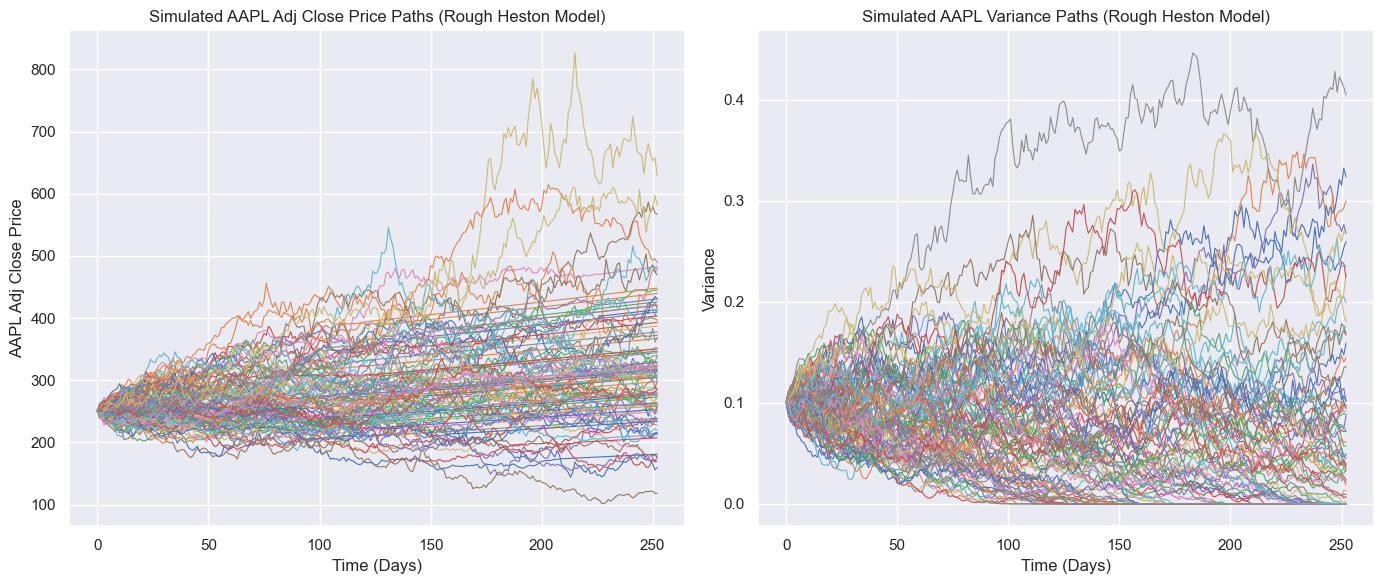

In [21]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from hurst import compute_Hc


# Download AAPL Adjusted Close Price
def get_stock_data(ticker):
    data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
    return data['Adj Close']

# Define Heston variance loss function
def heston_variance_loss(params, realized_variance):
    kappa, theta, xi = params
    V = [V0]
    for i in range(1, len(realized_variance)):
        Vt = V[-1]
        delta_V = kappa * (theta - Vt) + xi * np.sqrt(max(Vt, 0)) * np.random.normal()
        V.append(Vt + delta_V)
    V = np.array(V)
    return np.sum((realized_variance.values - V) ** 2)


def simulate_rough_heston(S0, v0, T, mu, rho, H, kappa, theta, xi, N, M):
    """
    Simulate paths for the Rough Heston Model.

    Parameters:
        S0 (float): Initial stock price.
        v0 (float): Initial variance.
        T (float): Time horizon.
        mu (float): Drift of the stock price.
        rho (float): Correlation between Brownian motions.
        H (float): Hurst parameter (0 < H < 0.5).
        kappa (float): Mean reversion speed.
        theta (float): Long-term variance.
        xi (float): Volatility of variance.
        N (int): Number of time steps.
        M (int): Number of Monte Carlo paths.

    Returns:
        paths (np.ndarray): Simulated stock price paths.
    """
    dt = T / N
    time_grid = np.linspace(0, T, N + 1)

    # Fractional kernel weights for volatility
    gamma_H = (np.arange(N) + 1) ** (H - 0.5)
    fractional_kernel = np.diff(np.insert(gamma_H, 0, 0))

    # Brownian motions
    dW_S = np.random.normal(0, np.sqrt(dt), size=(M, N))
    dW_v = rho * dW_S + np.sqrt(1 - rho ** 2) * np.random.normal(0, np.sqrt(dt), size=(M, N))

    # Initialize paths
    S_paths = np.zeros((M, N + 1))
    v_paths = np.zeros((M, N + 1))
    S_paths[:, 0] = S0
    v_paths[:, 0] = v0

    # Simulate paths
    for t in range(1, N + 1):
        # Update variance with fractional kernel
        fractional_vol = np.sum(fractional_kernel[:t] * (theta - v_paths[:, :t]), axis=1)
        vol_increment = kappa * fractional_vol * dt + xi * np.sqrt(v_paths[:, t - 1]) * dW_v[:, t - 1]
        v_paths[:, t] = np.maximum(v_paths[:, t - 1] + vol_increment, 0)  # Ensure non-negativity

        # Update stock price
        S_paths[:, t] = S_paths[:, t - 1] * np.exp(
            (mu - 0.5 * v_paths[:, t - 1]) * dt + np.sqrt(v_paths[:, t - 1]) * dW_S[:, t - 1]
        )

    return S_paths , v_paths

# Fetch data and estimate parameters
ticker  ="AAPL"
adj_close = get_stock_data(ticker)
returns = np.log(adj_close / adj_close.shift(1)).dropna()

#=============================================================================================
# Estimated Heston Model Parameters
#=============================================================================================
trading_days_per_year = 252


# Rough Heston model parameters
S0 = adj_close[-1]
V0 = returns.var() * trading_days_per_year
mu = returns.mean() * trading_days_per_year

# Estimate Hurst parameter using R/S analysis
H, _ , _ = compute_Hc(returns, kind='change', simplified=False)

# Estimate rho
# Realized variance
realized_variance = returns ** 2
delta_variance = realized_variance.diff().dropna()
rho = np.corrcoef(returns[1:], delta_variance)[0, 1]

# Optimize kappa, theta, xi
initial_guess = [2.0, 0.02, 0.3]
result = minimize(heston_variance_loss, initial_guess, args=(realized_variance), method='Nelder-Mead', bounds=[(0, None), (0, None), (0, None)])
kappa, theta, xi = result.x


# Display results
print("Estimated Parameters:")
print(f"V0 (Initial Variance): {V0:.6f}")
print(f"mu (Drift): {mu:.6f}")
print(f"kappa (Mean Reversion Speed): {kappa:.6f}")
print(f"theta (Long-Term Variance): {theta:.6f}")
print(f"xi (Vol of Vol): {xi:.6f}")
print(f"rho (Correlation): {rho:.6f}")
print(f'Hurst Exponent: {H:.6f}')

#=============================================================================================
# Rough Heston Model Simulation
#=============================================================================================

T = 1.0          # Time horizon (1 year)
N = trading_days_per_year          # Time steps
M = 1000         # Number of Monte Carlo paths

# Simulate paths
paths = simulate_rough_heston(S0, V0, T, mu, rho, H, kappa, theta, xi, N, M)
S, V  = simulate_rough_heston(S0, V0, T, mu, rho, H, kappa, theta, xi, N, M)

# Time grid
time  = np.linspace(0, T, N + 1)*N

plt.figure(figsize=(14, 6))

# Asset price paths
plt.subplot(1, 2, 1)
for i in range(100):  # Plot 100 sample paths
    plt.plot(time, S[i, :], lw=0.8)
plt.title(f"Simulated {ticker} Adj Close Price Paths (Rough Heston Model)")
plt.xlabel("Time (Days)")
plt.ylabel(f"{ticker} Adj Close Price")

# Variance paths
plt.subplot(1, 2, 2)
for i in range(100):  # Plot 100 sample paths
    plt.plot(time, V[i, :], lw=0.8)
plt.title(f"Simulated {ticker} Variance Paths (Rough Heston Model)")
plt.xlabel("Time (Days)")
plt.ylabel("Variance")

plt.tight_layout()
#plt.savefig('Rough Heston Model Sim.png')
plt.show()